# __Group Assignment__

__Submission Date:__ 26/03/2025

__Assignment: NLP-2024-2025: Assignment 1__

__Group Members:__
- ANZALONE Gabriel
- MBENGUE Ndèye Arame

__Firm level topic of discussion:__ Technological Disruption

__Task__ : Measure <u>Technological Disruption</u> with transcripts of Conference Calls.

### 1.1- Data Preparation and Text Cleaning

In [2]:
# Code for Github
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 92.2 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# Code for Github
! pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 52.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


- Loading data

Management Presentations:
These are the prepared, structured parts of the calls where management outlines key points. They tend to reflect the firm's official narrative on issues such as technological disruption.

Q&A Sessions:
The Q&A parts are more spontaneous and can reveal additional insights or clarifications that may not be in the prepared presentation. They might capture unexpected concerns or deeper discussions on technology topics that aren’t as polished.

__We decided to go with both to ensure a certain level of robustness to our measure.__

In [2]:
# Lets say that we just want to focus on the management presentation section of the Earnings Calls
# We import Earnings Calls and Q&A sessions of S&P500 from 2015 to 2021

import pandas as pd
# Loading Earning calls 
Sample_EC = pd.read_csv("https://www.dropbox.com/scl/fi/2p7ahxroqj9pwf98ni5an/Sample_Calls.csv?rlkey=zfieicvz891u4e3z0aroeg0u7&dl=1")

# Loading Presentations
Sample_Presentations = pd.read_feather("https://www.dropbox.com/scl/fi/uceh2xva5g4apbmt92cgt/Sample_Calls_Presentations.feather?rlkey=ln4nzsa4nenqyvm0pg2cur9sp&dl=1")
# Loading Q&As
Sample_QAs = pd.read_feather("https://www.dropbox.com/scl/fi/iq4111nlmsykp2tzxk9xg/Sample_Calls_QA.feather?rlkey=xabjqmwhesx05jivrlfzkgj6m&dl=1")

In [3]:
Sample_Presentations.head()

,file_name,presentation
0,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Good day and welcome to the Linear Technol...
1,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's first quar...
2,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's second qua...
3,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's third quar...
4,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,Welcome to Cerner Corporation's fourth qua...


In [4]:
Sample_QAs.head()

,QA,speaker_name,file_name,QA_text,QA_number
0,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Thanks very much. Don, could you give us some ...",1
1,a,don zerio,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Yes, David, as you know we retired our convert...",1
2,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Great, thanks.",2
3,q,craig hettenbach,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Great thank you. Just a question on the commen...,3
4,a,lothar maier,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"When you think about China you know, particula...",3


In [5]:
# filtering for answers only for the Q&A
temp = Sample_QAs[Sample_QAs['QA'] == 'a']
# Aggregating Answers by file_name
temp = temp.groupby('file_name')['QA_text'].apply(lambda x: ' '.join(x)).reset_index()
# Merging Back into the Main Dataset
Sample_answers = Sample_EC.merge(temp)

In [6]:
Sample_answers

,GVKEY,date_rdq,co_conm,file_name,CAR-11-Carhart,CAR-11-ff3,CAR01-Carhart,CAR01-ff3,IV,hvol,...,niq,epspxq,epspiq,dlttq,dlcq,prccq,cshoq,dvpq,xintq,QA_text
0,16101.0,2016-07-29 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.011886,0.014261,0.014261,0.021246,0.179151,0.129186,...,1610.0,0.99,0.99,37328.0,517.0,61.91,1628.542,0.0,245.0,"Jeff, this is Rick. I will cover the first and..."
1,16101.0,2016-04-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.026387,0.023499,0.023499,0.021770,0.289777,0.114447,...,1354.0,0.83,0.83,29490.0,2423.0,57.12,1617.359,0.0,215.0,"Okay. Hi, Jeff, it's Rick. So I'll take I gues..."
2,16101.0,2016-10-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.078668,-0.079290,-0.079290,-0.092594,0.253269,0.381002,...,1598.0,0.97,0.97,37284.0,26.0,63.07,1624.908,0.0,271.0,"Sure, Jami; this is Rick. Thank you for the qu..."
3,16101.0,2017-01-27 14:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.010152,-0.000737,-0.000737,-0.005279,0.182080,0.145941,...,1391.0,0.85,0.85,36440.0,402.0,62.62,1592.513,0.0,277.0,"Hi, Jami; it's Bill. So on your operating marg..."
4,16101.0,2017-04-27 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,0.010397,0.010672,0.010672,0.012819,0.192822,0.112189,...,1711.0,1.07,1.07,36526.0,425.0,65.16,1591.366,0.0,273.0,"Yes. Well, first, thanks for the question. May..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,189491.0,2016-11-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.022716,-0.023069,-0.023069,-0.015313,0.238038,0.176583,...,73.0,0.41,0.41,1148.0,62.0,52.45,179.400,0.0,12.0,"Yes, well, thanks for the question, Jim. First..."
2873,189491.0,2016-08-02 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.036201,-0.034737,-0.034737,-0.037363,0.201698,0.213624,...,71.0,0.39,0.39,1143.0,91.0,44.65,179.200,0.0,12.0,"Sure, Deane. Let me just characterize what we ..."
2874,189491.0,2020-07-30 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...,-0.030116,-0.028020,-0.028020,-0.049431,0.325614,0.345711,...,31.0,0.17,0.17,3031.0,269.0,64.96,180.000,0.0,18.0,"That is correct, Dean, on both counts. Sure. Y..."
2875,189491.0,2018-05-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,-0.066260,-0.064927,-0.064927,-0.058477,0.206359,0.215869,...,79.0,0.44,0.44,2228.0,371.0,76.92,179.500,0.0,21.0,"Yes, I'll go first here, Nate. And I think the..."


In [7]:
# Filtering for consistency
Sample_Presentations = Sample_Presentations[
    Sample_Presentations['presentation'].str.split().apply(len) > 50 # filter to keep presentations with at least 50 words and to remove noise
].reset_index(drop=True)

# Grouping by file_name and concatenating presentation column (concatenating all text belonging to the same call into one large text entry)
Pres = Sample_Presentations.groupby("file_name")["presentation"].agg(lambda x: " ".join(x)).reset_index()
Pres.columns= ["file_name","text"]


- Prep-processing Textual Data

In [8]:
# librairies
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #breaking text into words
from nltk.stem import WordNetLemmatizer #reducing words to their base form

# Downloading data 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# We first tokenize words & remove the stopwords
stop_words = set(stopwords.words('english')) # preprocessing all words, removing the stopwords and using tokenization

def preprocess_text(text):
    tokens = word_tokenize(text.lower()) # putting all in lowercase format
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

Pres['tokens'] = Pres['text'].apply(preprocess_text)

Sample_answers['tokens'] = Sample_answers['QA_text'].apply(preprocess_text)

In [10]:
# Then we lemmatize to have a unified format
# Either use WordNetLemmatizer or Spacy -> better to use the latter to take the context of each word into account (POS Tagging)
# But it is way Longer than WordNet to run

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

Pres['tokens'] = Pres['tokens'].apply(lemmatize_text)

Sample_answers['tokens'] = Sample_answers['tokens'].apply(lemmatize_text)

In [11]:
Pres['tokens'].head(10)

0    [lady, gentleman, thank, standing, welcome, fi...
1    [welcome, prudential, quarterly, earnings, cal...
2    [lady, gentleman, thank, standing, welcome, pr...
3    [lady, gentleman, thank, standing, welcome, q1...
4    [lady, gentleman, thank, standing, welcome, q2...
5    [thank, tom, good, morning, everyone, welcome,...
6    [welcome, southwest, airline, second, quarter,...
7    [thank, tom, good, morning, everyone, welcome,...
8    [lady, gentleman, thank, standing, welcome, an...
9    [lady, gentleman, thank, standing, welcome, an...
Name: tokens, dtype: object

In [12]:
Sample_answers['tokens'].head(10)

0    [jeff, rick, cover, first, third, one, mike, c...
1    [okay, hi, jeff, rick, take, guess, question, ...
2    [sure, jami, rick, thank, question, think, loo...
3    [hi, jami, bill, operating, margin, question, ...
4    [yes, well, first, thanks, question, maybe, le...
5    [okay, jami, thanks, much, question, try, take...
6    [okay, mike, maybe, start, talking, rate, cove...
7    [right, jami, rick, first, thank, compliment, ...
8    [right, thanks, jami, rick, appreciate, questi...
9    [rick, take, first, question, mike, cover, sec...
Name: tokens, dtype: object

In [13]:
Pres['text'].isnull().sum() # 0 null value

0

In [14]:
Sample_answers['QA_text'].isnull().sum() # 0 null value

0

Let us focus on the presentations to construct our primary measure. Once we have a robust pipeline, we could perform a parallel analysis with the Q&A texts to see if there are any notable differences in how technological disruption is discussed.

### 1.2 - Measure Construction

### 1.2.A - Naive method 

In [18]:
# Starting with a set of seed words known to capture the essence of technological disruption

tech_dict = [
    "disrupt", "disruption",
    "innovate", "innovation",
    "digitize", "digital",
    "automation", "automate",
    "artificial", "intelligence",
    "machine", "learning",
    "blockchain", "cyber", 
    "robot", "iot", "tech"
]

In [19]:
# computing the score 
# We’ll define a function that takes the list of tokens for a given transcript and returns the frequency (or proportion) of tokens that are in our technology dictionary
def tech_score(tokens, tech_words):
    # Avoid division by zero
    if len(tokens) == 0:
        return 0
    # Count how many tokens are in the technology dictionary
    count = sum(1 for token in tokens if token in tech_words)
    # Return the proportion of tech-related words
    return count / len(tokens)


In [21]:
Pres['tech_score'] = Pres['tokens'].apply(lambda tokens: tech_score(tokens, tech_dict))
print(Pres[['file_name', 'tech_score']].head(10))

                                           file_name  tech_score
0  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
1  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
2  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
3  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.001849
4  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.002694
5  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
6  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
7  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
8  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
9  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000


Merging with Firm-Level Data and Creating Quarter-Level Aggregates: 

Next, we merge the presentation data (with our computed tech_score) with firm-level metadata from Sample_EC (which contains firm identifiers and the reporting date). Then, we convert the reporting date into a quarterly period and calculate the average disruption measure for each firm and quarter.

In [22]:
# Merge Pres (which has file_name and tech_score) with firm metadata
merged = pd.merge(
    Pres,
    Sample_EC[['file_name', 'GVKEY', 'co_conm', 'date_rdq']],
    on='file_name',
    how='left'
)

# Convert the reporting date to datetime and extract the quarter
merged['date_rdq'] = pd.to_datetime(merged['date_rdq'])
merged['quarter'] = merged['date_rdq'].dt.to_period('Q')

# Now, group by firm and quarter and calculate the average tech_score
firm_quarter = merged.groupby(['co_conm', 'quarter'])['tech_score'].mean().reset_index()

# Display the resulting DataFrame
print(firm_quarter.head())


      co_conm quarter  tech_score
0  ABBVIE INC  2016Q2    0.000327
1  ABBVIE INC  2016Q3    0.000000
2  ABBVIE INC  2016Q4    0.000000
3  ABBVIE INC  2017Q1    0.000000
4  ABBVIE INC  2017Q2    0.000000


/tmp/ipykernel_1524/4067938607.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['quarter'] = merged['date_rdq'].dt.to_period('Q')


A. Sorting Firms by Their Tech Score
You can explore which firms have the highest or lowest technological disruption scores in a given quarter. 

In [23]:
# Sort the firm_quarter DataFrame by tech_score in descending order
sorted_firms = firm_quarter.sort_values(by='tech_score', ascending=False)
print("Top firms with high technological disruption score:")
print(sorted_firms.head(10))

print("\nFirms with low technological disruption score:")
print(sorted_firms.tail(10))


Top firms with high technological disruption score:
                       co_conm quarter  tech_score
622   COGNIZANT TECH SOLUTIONS  2017Q4    0.029772
621   COGNIZANT TECH SOLUTIONS  2017Q3    0.029437
619   COGNIZANT TECH SOLUTIONS  2017Q1    0.026060
624   COGNIZANT TECH SOLUTIONS  2018Q2    0.024725
1828           NIKE INC  -CL B  2020Q4    0.024182
620   COGNIZANT TECH SOLUTIONS  2017Q2    0.023854
625   COGNIZANT TECH SOLUTIONS  2018Q3    0.023284
1827           NIKE INC  -CL B  2020Q3    0.021989
623   COGNIZANT TECH SOLUTIONS  2018Q1    0.021947
1821           NIKE INC  -CL B  2019Q1    0.021900

Firms with low technological disruption score:
                     co_conm quarter  tech_score
1453        LILLY (ELI) & CO  2018Q4         0.0
1665   MONSTER BEVERAGE CORP  2016Q4         0.0
1669   MONSTER BEVERAGE CORP  2017Q4         0.0
1671   MONSTER BEVERAGE CORP  2018Q2         0.0
1672   MONSTER BEVERAGE CORP  2018Q3         0.0
1673   MONSTER BEVERAGE CORP  2018Q4         

B. Visualizing the Aggregate Trend Over Time
Next, it’s useful to see how the average technological disruption discussion evolves over time. You can compute the average tech score for each quarter across all firms and then plot a time series.

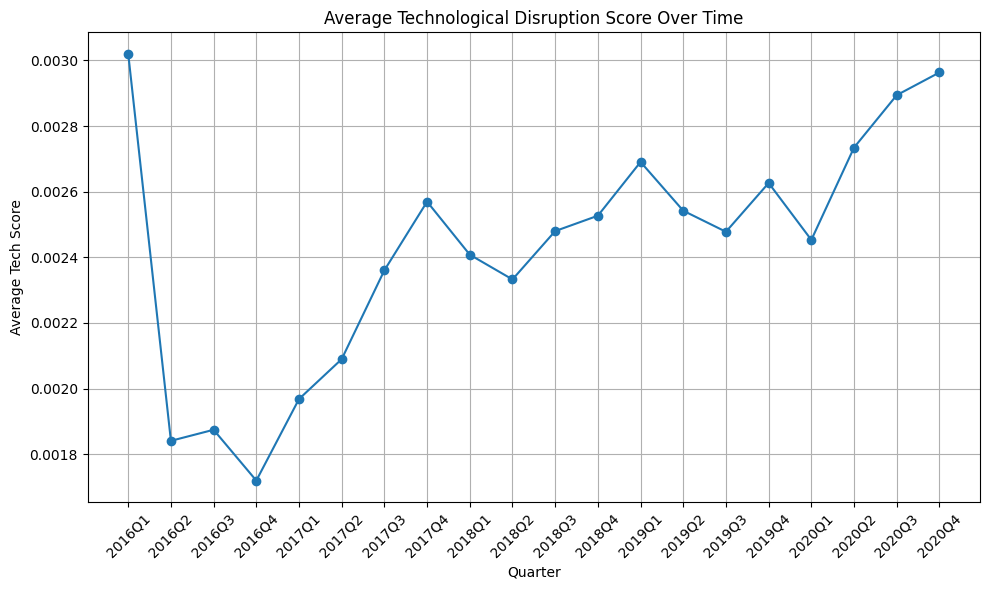

In [24]:
import matplotlib.pyplot as plt

# Group by quarter and calculate the average tech_score
agg_quarter = merged.groupby('quarter')['tech_score'].mean().reset_index()

# Convert quarter to string for better plotting on the x-axis
agg_quarter['quarter_str'] = agg_quarter['quarter'].astype(str)

plt.figure(figsize=(10,6))
plt.plot(agg_quarter['quarter_str'], agg_quarter['tech_score'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Average Technological Disruption Score Over Time")
plt.xlabel("Quarter")
plt.ylabel("Average Tech Score")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1.1.B - Using Cosine Similarity

- Using Google's Word2Vec API model to find words related to "technological disruption

In [1]:
%%capture
!pip uninstall -y numpy gensim scipy smart-open
!pip install numpy==1.25.2 scipy gensim smart-open
# After this, restart the session (restart kernel, don't delete runtime)

In [1]:
# Loading Google's pre-trained Word2Vec model with 300-dimensional vector
import gensim.downloader as api
google_model = api.load("word2vec-google-news-300")

: 

- Finding words similar to the key terms to help build a vocabulary related to "technological disruption".

In [2]:
# What we will do is select a bunch of words based on their similarity with Technological Disruption and add them to our tech dictionnary
# First using: "most_similar" function of google_model
# Limit = we can use only one word
print(google_model.most_similar("technological", topn=5))

NameError: name 'google_model' is not defined

In [ ]:
print(google_model.most_similar("disruption", topn=5))

[('disruptions', 0.8658042550086975), ('interruption', 0.658836841583252), ('interruptions', 0.6469897627830505), ('distruption', 0.6304445862770081), ('disrupted', 0.6218001842498779)]


In [ ]:
print(google_model.most_similar("technological_innovations", topn=5))

[('innovations', 0.7695900797843933), ('technological_advances', 0.7287052869796753), ('technological_advancements', 0.7118793725967407), ('technological_advancement', 0.6809303760528564), ('technologies', 0.6743346452713013)]


In [ ]:
# Lets say we want to create a bag of words that are closely linked to technological disruption:
# We can select among these and add our proper words to create a dictionnary:

keywords = ["disruption","technological","interruption","advancement","innovation","ai","automation", "robotics", "technology"]

Computing Cosine Similarity mean of this vector

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# If we take the mean of all of these keywords in the model, and word with the cosine similarity:
tech_vectors = np.mean([google_model[word] for word in keywords if word in google_model], axis=0)

def compute_similarity(tokens):
    vectors = np.array([google_model[word] for word in tokens if word in google_model])
    if vectors.size == 0:
        return 0  # Aucun mot trouvé dans le modèle
    avg_vector = np.mean(vectors, axis=0)
    similarity = cosine_similarity([avg_vector], [tech_vectors])[0][0]
    return similarity

Pres['tech_disruption_score'] = Pres['tokens'].apply(compute_similarity) # affecting a score to each

Filtering Companies based on their score

In [ ]:
Pres = Pres.merge(Sample_EC[['file_name', 'co_conm']], on='file_name', how='left') # we merge the data to get the names of the companies

sorted_pres = Pres.sort_values(by='tech_disruption_score', ascending=False) # filtering by the disruption score

top_10 = sorted_pres[['file_name', 'co_conm', 'tech_disruption_score']].head(10)
bottom_10 = sorted_pres[['file_name', 'co_conm', 'tech_disruption_score']].tail(10)

In [ ]:
print("These are the Top 10 companies related to Technological Disruption:")
print(top_10)

print("\nThese are the Bottom 10 companies related to Technological Disruption:")
print(bottom_10)

These are the Top 10 companies related to Technological Disruption:
                                              file_name  \
2557  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
1948  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2019...   
446   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...   
2805  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
2595  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
695   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   
780   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   
1996  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2019...   
1464  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...   
510   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   

                       co_conm  tech_disruption_score  
2557               NVIDIA CORP               0.597319  
1948                 ANSYS INC               0.596867  
446                NVIDIA CORP               0.591857  
2805               NVIDIA CORP               0.588900  
25

<b>Comments on this:</b>
- We see pure technological players (what we would expect actually): Nvidia, Synopsis (operating in the semiconductor field)
- But we also observe Netflix within the Bottom 10, even though it ictually is related to technological disruption.

Piste d'amélioration à ce niveau : améliorer la recherche des keywords ?

In [ ]:
# Calculer la similarité cosinus entre la moyenne des vecteurs des mots-clés et tous les mots du modèle
def get_most_similar_words_to_avg_vector(model, avg_vector, top_n=10):
    similarities = {}
    for word in model.index_to_key:  # Iterer sur tous les mots dans le modèle
        word_vector = model[word]
        similarity = cosine_similarity([avg_vector], [word_vector])[0][0]  # Calculer la similarité cosinus
        similarities[word] = similarity

    # Trier les mots en fonction de la similarité cosinus et obtenir les 'top_n' mots les plus proches
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Obtenir les 10 mots les plus proches de la moyenne des vecteurs des mots-clés
most_similar_words = get_most_similar_words_to_avg_vector(google_model, tech_vectors, top_n=10)

# Afficher les mots les plus similaires à la moyenne des mots-clés
print("Most similar words to the average of technological disruption keywords:")
for word, similarity in most_similar_words:
    print(f"{word}: {similarity}")

In [ ]:
import matplotlib.pyplot as plt

# Ajouter une colonne 'quarter' à partir de la date
Pres['quarter'] = pd.to_datetime(Sample_EC['date_rdq']).dt.to_period('Q')

# Agréger les scores de disruption technologique par trimestre
quarterly_scores = Pres.groupby('quarter')['tech_disruption_score'].mean()

# Tracer les résultats
plt.figure(figsize=(10, 6))
quarterly_scores.plot(kind='line')
plt.title("Technological Disruption Over Time")
plt.xlabel("Quarter")
plt.ylabel("Average Technological Disruption Score")
plt.grid(True)
plt.show()


In [ ]:
# 4. Explorer la réaction du marché (exemple avec des rendements boursiers)
# Remplacer par les rendements boursiers réels si disponibles dans le dataset
Pres['stock_return'] = Sample_EC['CAR-11-Carhart']  # Exemple d'une variable de rendement

# Calculer la corrélation entre les scores de disruption technologique et les rendements boursiers
correlation = Pres['tech_disruption_score'].corr(Pres['stock_return'])
print(f"Correlation between tech disruption score and stock return: {correlation}")

In [ ]:
import statsmodels.api as sm

# 1. Préparer les données pour la régression
# Dépendant : CAR-11-Carhart (rendement boursier, ou autre variable)
# Indépendant : tech_disruption_score (score de disruption technologique)

# Ajouter les rendements boursiers réels ou toute autre variable financière
Pres['stock_return'] = Sample_EC['CAR-11-Carhart']  # Remplacer par les rendements réels si disponibles

# Supprimer les valeurs manquantes pour éviter les erreurs dans la régression
Pres.dropna(subset=['tech_disruption_score', 'stock_return'], inplace=True)

# Variables indépendantes (score de disruption technologique)
X = Pres[['tech_disruption_score']]

# Variable dépendante (rendement boursier)
y = Pres['stock_return']

# Ajouter une constante à la matrice des variables indépendantes pour le modèle
X = sm.add_constant(X)

# S'assurer que les indices sont cohérents après suppression des valeurs manquantes
y = y.loc[X.index]

# Convertir les variables en numériques (si nécessaire)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 2. Ajuster le modèle de régression (modèle OLS)
ols_model = sm.OLS(y, X).fit()

# 3. Afficher le résumé de la régression
print(ols_model.summary())


In [ ]:
# R squared = 0 and non significance...

2 - Using Doc2Vec